# Modelos Compostos

In [22]:
%run ../src/feature_engineering.py
%run ../src/model_evaluation.py
%run ../src/plot.py
%run ../src/pipeline.py

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers

%matplotlib inline
#Alterando configurações padrão dos plots
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 60)

In [27]:
course_df = pd.read_csv('../data/preprocessed/edx_2014_train.csv',low_memory=False)
course_df.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,...,course_has_certification,course_subject,course_level,course_language,course_transcript_en,course_transcript_pt,course_transcript_es,course_transcript_de,course_transcript_cn,course_year
0,CB22x,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,History,Introductory,English,False,False,False,False,False,CB22x_2013
1,CS50x,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
2,CB22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,NaN,History,Introductory,English,False,False,False,False,False,CB22x_2013
3,CS50x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,True,Computer Science,Introductory,English,True,False,False,False,False,CS50x_2012
4,ER22x,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,...,False,Humanities,Introductory,English,True,True,True,True,True,ER22x_2013


2018-06-08 17:17:02 Iniciando modelo DL
2018-06-08 17:17:02 Iniciando curso CB22x
2018-06-08 17:18:09 Treinamento OK!
2018-06-08 17:18:09 Resultados {'mean_squared_error': 0.0042551102404805, 'mean_absolute_error': 0.009809486749750004, 'explained_variance_score': 0.46021634910501075, 'r2_score': 0.4517140132344132}
2018-06-08 17:18:09 Iniciando curso CS50x
2018-06-08 17:24:16 Treinamento OK!
2018-06-08 17:24:17 Resultados {'mean_squared_error': 0.0009482982540287819, 'mean_absolute_error': 0.005167409050083712, 'explained_variance_score': 0.8730628727278582, 'r2_score': 0.8695857740625711}
2018-06-08 17:24:17 Iniciando curso ER22x
2018-06-08 17:26:26 Treinamento OK!
2018-06-08 17:26:26 Resultados {'mean_squared_error': 0.001900674971173674, 'mean_absolute_error': 0.016496024111658365, 'explained_variance_score': 0.9379667083549613, 'r2_score': 0.9332180710414615}
2018-06-08 17:26:27 Iniciando curso PH207x
2018-06-08 17:27:52 Treinamento OK!
2018-06-08 17:27:52 Resultados {'mean_square

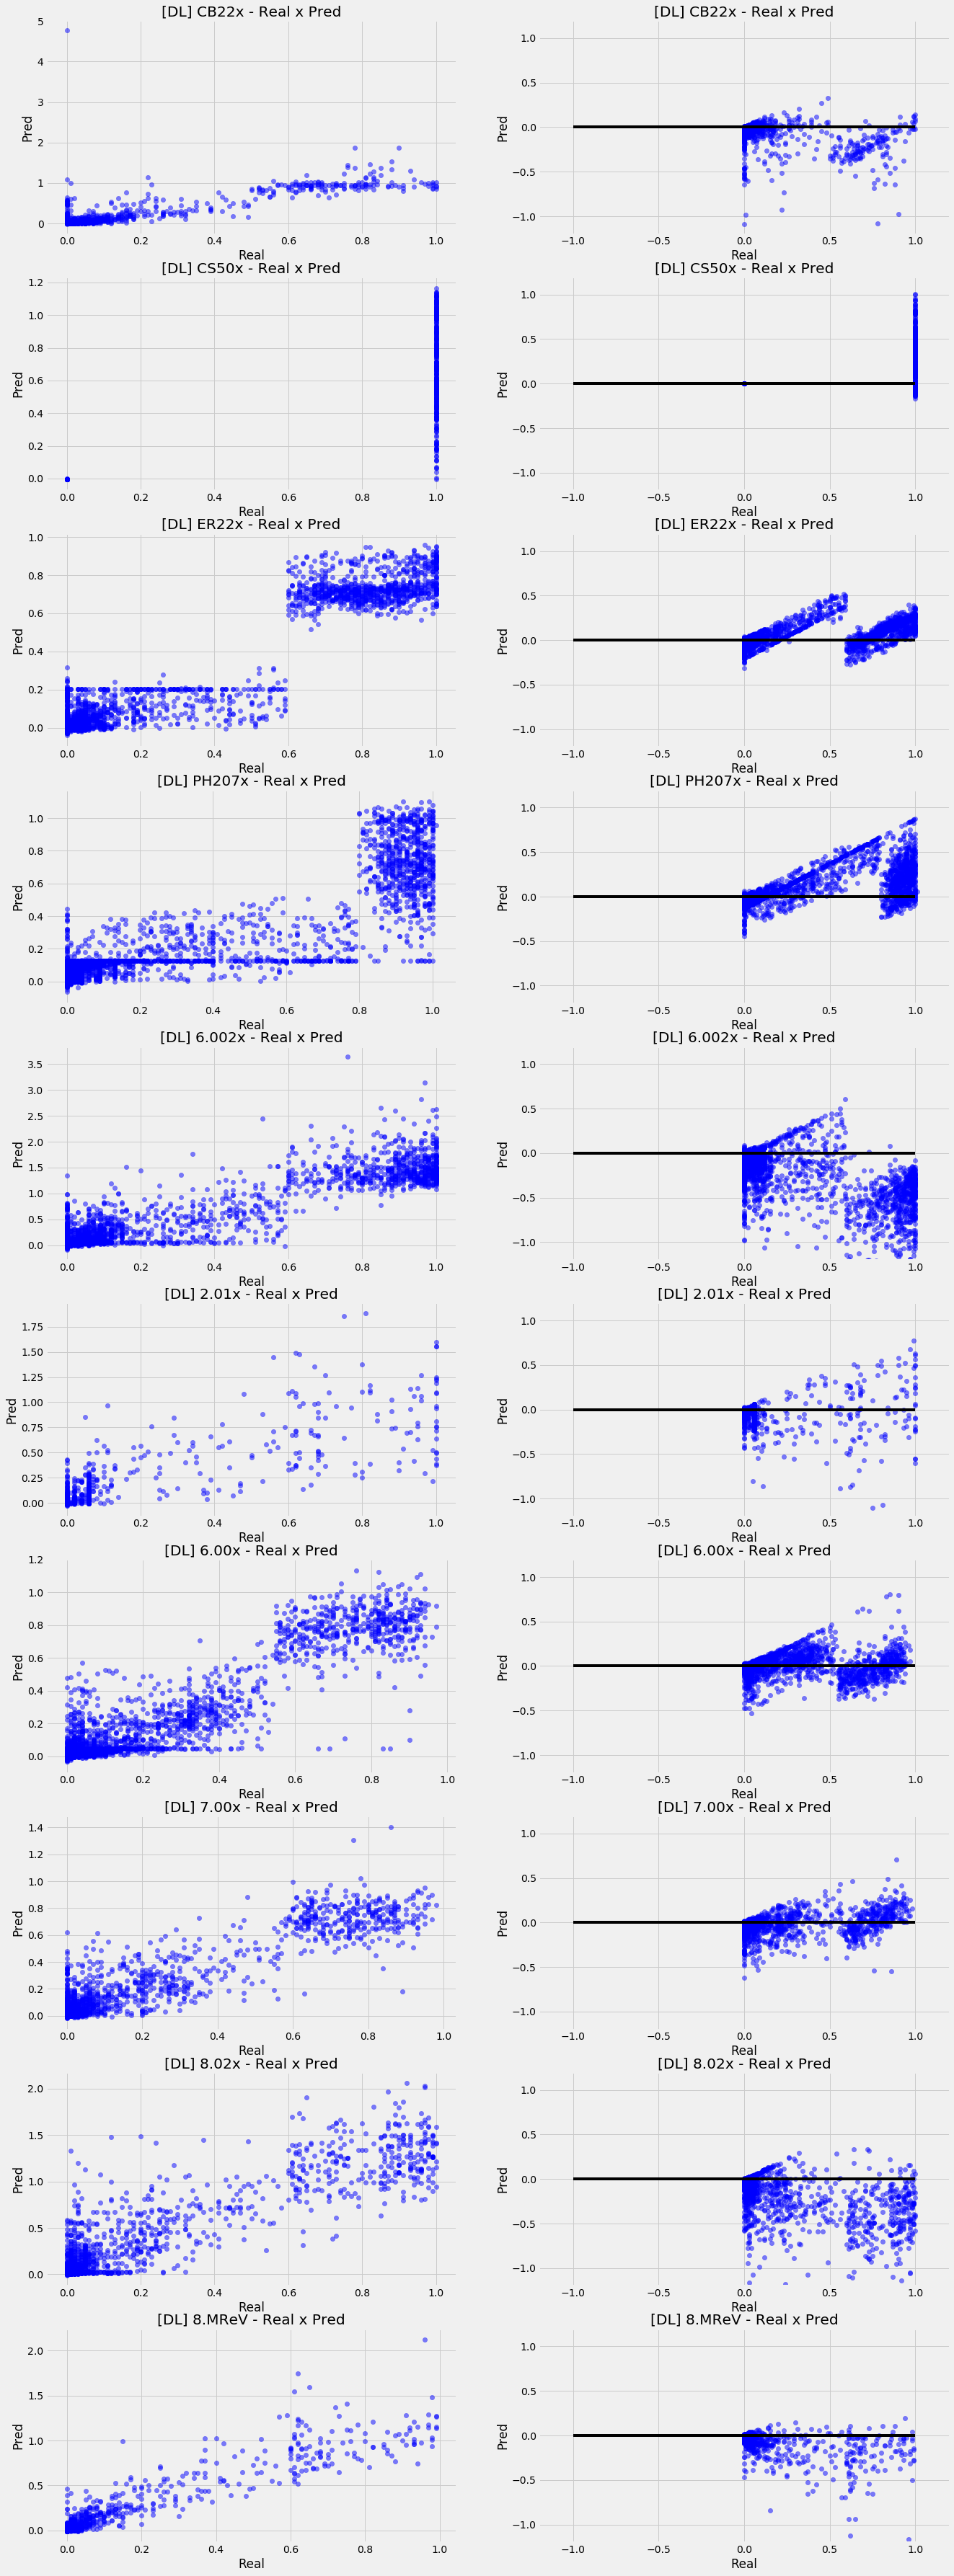

In [24]:
flatten = lambda l: [item for sublist in l for item in sublist]

class ModelDecorator:
    def __init__(self, model):
        self._model = model
        
    def fit(self, X, y):
        return self._model.fit(X, y, epochs=100, verbose=0)
    
    def predict(self, X):
        return flatten(self._model.predict(X))

class DL:
    def provide(self):
        model = models.Sequential()
        model.add(layers.Dense(128, activation='relu', input_dim=13))
        model.add(layers.Dense(128, activation='relu'))    
        model.add(layers.Dense(1))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        return ModelDecorator(model)
        
       
    
course_df['grade'] = course_df['grade'].map(lambda g: g if g > 0 else 0)
    
results, plt = train_evaluate([DL()], course_df, split_criteria='course_id', feature_extractor=feature_extract, 
                              label='grade', evaluation=regression_evaluation, 
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()


In [25]:
def build_model(shape):
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_dim=shape))
    model.add(layers.Dense(128, activation='relu'))    
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    model.summary()
    
    return model

course = course_df[course_df['course_id'] == '6.00x']
course = feature_extract(course)
X, y = course.loc[:, course.columns != 'grade'], course['grade'].map(lambda g: 1 if g >= 0 else 0 )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


#model = build_model(X_train.shape[1])
#model.fit(X_train, y_train, epochs=100, verbose=1)
#val_mse, val_mae = model.evaluate(X_test, y_test, verbose=1)



#mean = X_train.mean(axis=0)
#X_train -= mean
#std = X_train.std(axis=0)
#X_train /= std
#X_test -= mean
#X_test /= std


#print(X_train.shape)

#print (val_mse, val_mae)

In [29]:
reform = {(level2_key, level3_key): values
              for level1_key, level2_dict in results.items()
              for level2_key, level3_dict in level2_dict.items()
              for level3_key, values      in level3_dict.items()}
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame(reform, index=['DeepLearning']).T

DeepLearning
2.01x  explained_variance_score        0.2365
       mean_absolute_error             0.1689
       mean_squared_error              0.0850
       r2_score                        0.2361
6.002x explained_variance_score        0.2814
       mean_absolute_error             0.2899
       mean_squared_error              0.1490
       r2_score                        0.2810
6.00x  explained_variance_score        0.4931
       mean_absolute_error             0.1322
       mean_squared_error              0.0677
       r2_score                        0.4883
7.00x  explained_variance_score        0.3833
       mean_absolute_error             0.1180
       mean_squared_error              0.0565
       r2_score                        0.3805
8.02x  explained_variance_score        0.2069
       mean_absolute_error             0.1643
       mean_squared_error              0.0734
       r2_score                        0.1966
8.MReV explained_variance_score       -5.8163
       mean_absolute_error             0.3217
       mean_squared_error              0.6703
       r2_score                       -6.2402
CB22x  explained_variance_score        0.0671
       mean_absolute_error             0.3028
       mean_squared_error              0.1543
       r2_score                        0.0671
CS50x  explained_variance_score        0.5124
       mean_absolute_error             0.0172
       mean_squared_error              0.0071
       r2_score                        0.5120
ER22x  explained_variance_score        0.1896
       mean_absolute_error             0.2439
       mean_squared_error              0.1398
       r2_score                        0.1723
PH207x explained_variance_score        0.3273
       mean_absolute_error             0.2382
       mean_squared_error              0.1254
       r2_score                        0.3273

2018-06-08 17:45:00 Iniciando modelo DL
2018-06-08 17:45:00 Iniciando curso CB22x
2018-06-08 17:45:47 Treinamento OK!
2018-06-08 17:45:47 Resultados {'mean_squared_error': 0.15425971784834488, 'mean_absolute_error': 0.30283247509665034, 'explained_variance_score': 0.06712517462512047, 'r2_score': 0.06709087814401082}
2018-06-08 17:45:47 Iniciando curso CS50x
2018-06-08 17:50:31 Treinamento OK!
2018-06-08 17:50:32 Resultados {'mean_squared_error': 0.007142110635694495, 'mean_absolute_error': 0.017211030741341497, 'explained_variance_score': 0.5124432228490932, 'r2_score': 0.5119989207314264}
2018-06-08 17:50:32 Iniciando curso ER22x
2018-06-08 17:52:11 Treinamento OK!
2018-06-08 17:52:11 Resultados {'mean_squared_error': 0.1397744537196447, 'mean_absolute_error': 0.2438845500619171, 'explained_variance_score': 0.18956306021165725, 'r2_score': 0.17227069100255443}
2018-06-08 17:52:12 Iniciando curso PH207x
2018-06-08 17:53:21 Treinamento OK!
2018-06-08 17:53:21 Resultados {'mean_squared_

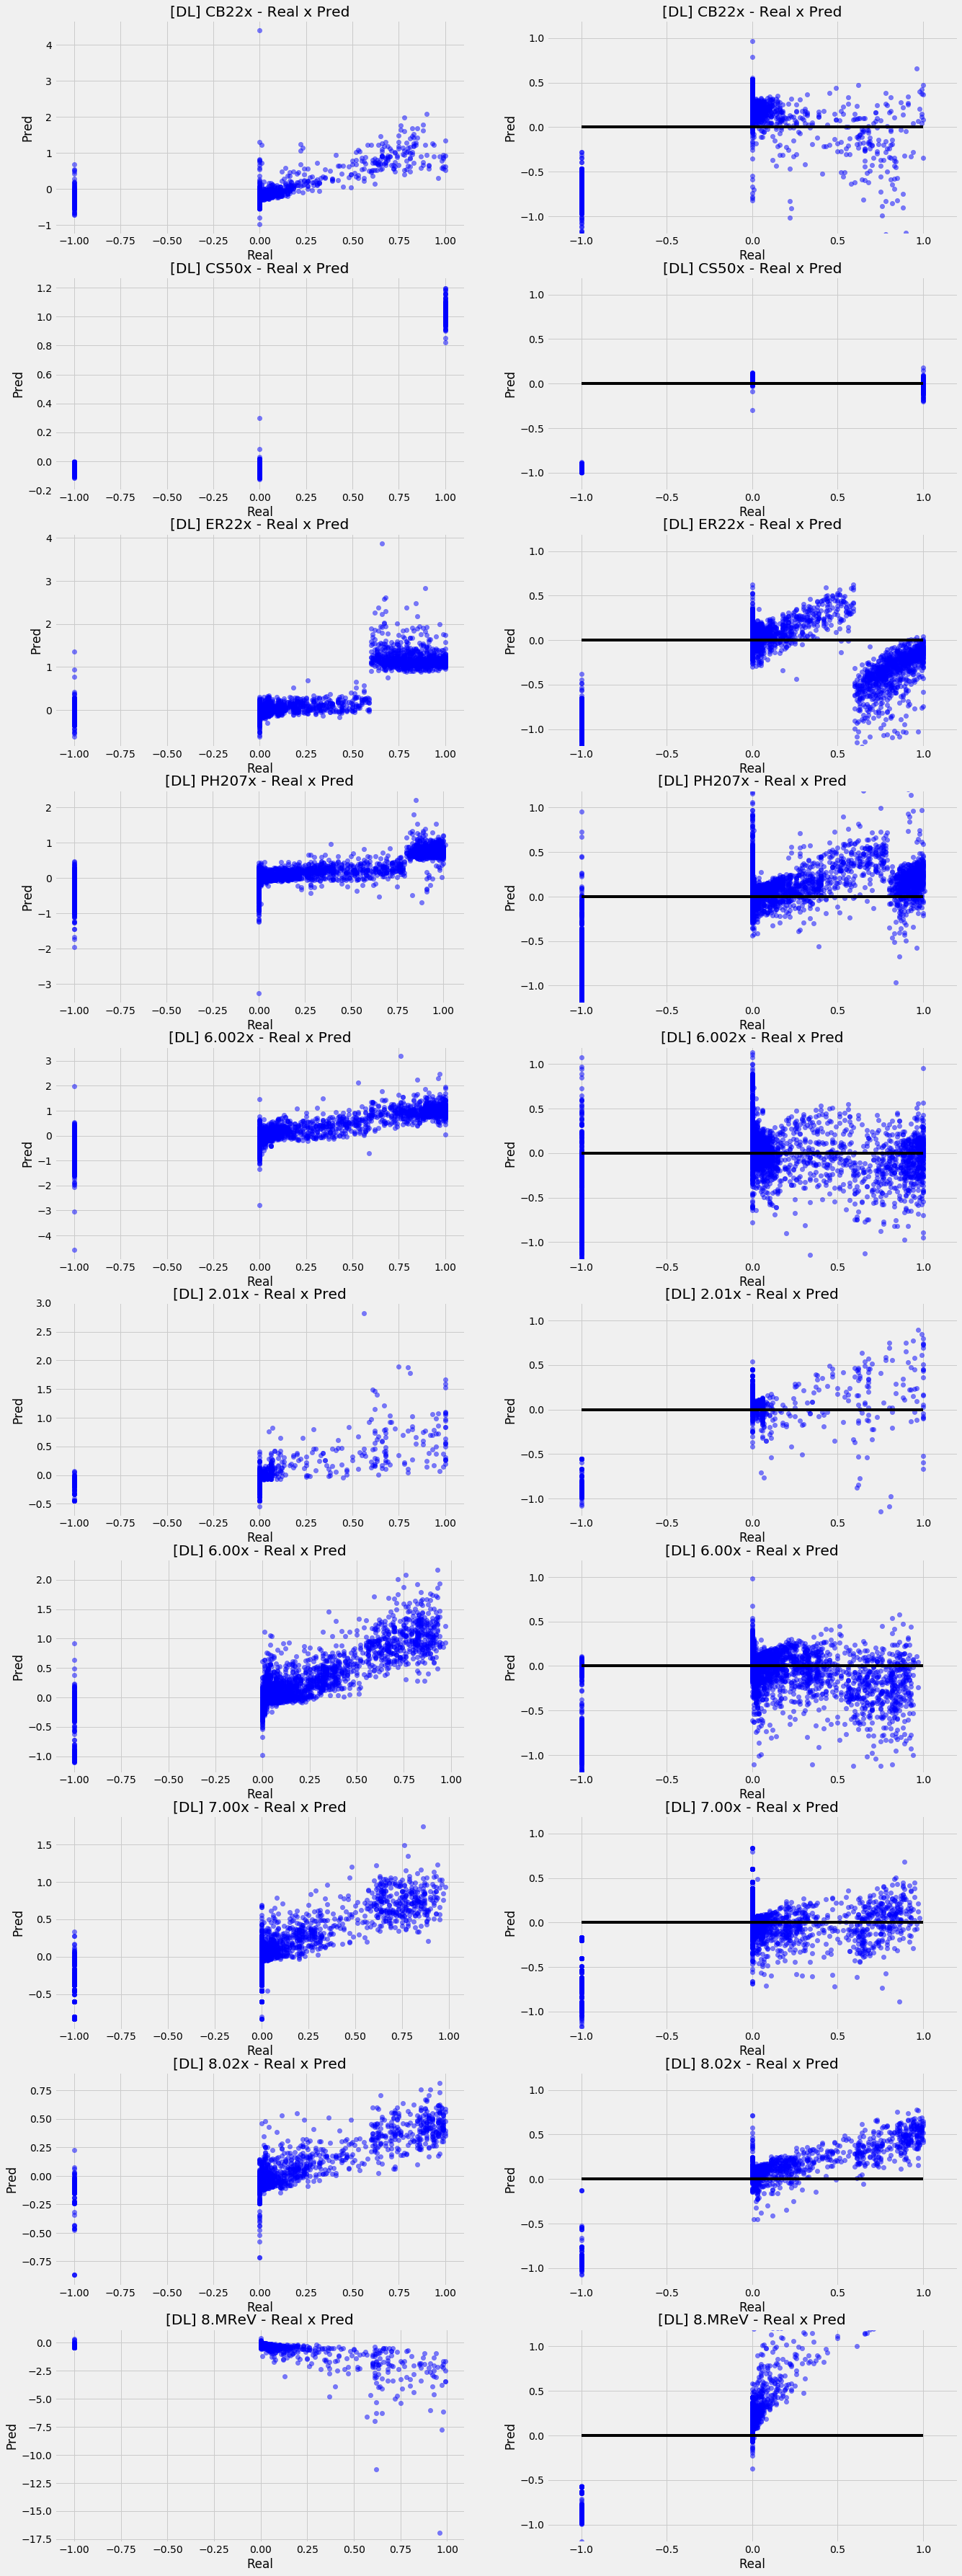

In [28]:
flatten = lambda l: [item for sublist in l for item in sublist]

class ModelDecorator:
    def __init__(self, model):
        self._model = model
        
    def fit(self, X, y):
        return self._model.fit(X, y, epochs=100, verbose=0)
    
    def predict(self, X):
        return flatten(self._model.predict(X))

class DL:
    def provide(self):
        model = models.Sequential()
        model.add(layers.Dense(13, activation='relu', input_dim=13))
        model.add(layers.Dense(13, activation='relu'))    
        model.add(layers.Dense(1))
        model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
        return ModelDecorator(model)
        
       
    
results, plt = train_evaluate([DL()], course_df, split_criteria='course_id', feature_extractor=feature_extract, 
                              label='grade', evaluation=regression_evaluation, 
                              plots= [scatter_real_vs_pred_subplot, scatter_residual_error_subplot])

plt.show()